<a href="https://colab.research.google.com/github/amrutha-m-sajeev/Machine-learning-using-SVM-KNN-Naviebayse-Algorithms/blob/main/churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

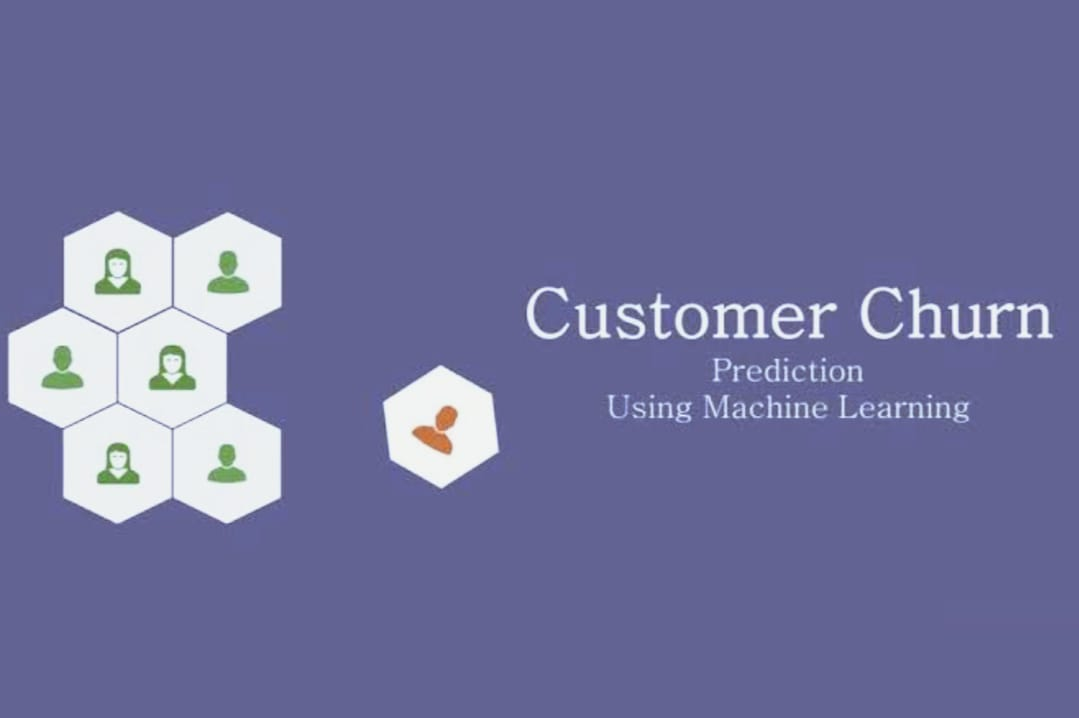

**PROBLEM STATEMENT:**



Finding factors and cause those influence customers to churn. Retain churn customers by taking
appropriate steps providing offers based on affecting factors. Using the data provided, this paper
aims to analyze the data to determine what variables are correlated with customer churn, if any. To
identify the people that might churn, will also be analyze.



**APPROACH:**


Exploratory Data Analysis (EDA) is an approach to analyze data. The first and foremost task is that
the data analysis to view the data and tries to make some sense out of it. Later we figure out what
question we want to ask and how to use the available data to get the insights and all the answers that
we need from the data set. EDA helps us to


 Delve into the dataset


 Examine the relationships among the variables


 Identify the interesting observation*


 Develop an initial idea of possible associations among the predictors and the target        variable 





***TRAINING DATA***









 **Preprocessing Training Data**

In [58]:
import numpy as np
import pandas as pd
import seaborn as sns
df=pd.read_csv('/content/churn-bigml-80.csv')
df

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2661,SC,79,415,No,No,0,134.7,98,22.90,189.7,68,16.12,221.4,128,9.96,11.8,5,3.19,2,False
2662,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
2663,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
2664,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False


In [59]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [60]:
df.tail()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
2661,SC,79,415,No,No,0,134.7,98,22.90,189.7,68,16.12,221.4,128,9.96,11.8,5,3.19,2,False
2662,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
2663,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
2664,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
2665,TN,74,415,No,Yes,25,234.4,113,39.85,265.9,82,22.60,241.4,77,10.86,13.7,4,3.70,0,False


In [61]:
df.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,2666.000000,2666.000000,2666.000000,2666.00000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000
mean,100.620405,437.438860,8.021755,179.48162,100.310203,30.512404,200.386159,100.023631,17.033072,201.168942,100.106152,9.052689,10.237022,4.467367,2.764490,1.562641
std,39.563974,42.521018,13.612277,54.21035,19.988162,9.215733,50.951515,20.161445,4.330864,50.780323,19.418459,2.285120,2.788349,2.456195,0.752812,1.311236
min,1.000000,408.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,43.700000,33.000000,1.970000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,408.000000,0.000000,143.40000,87.000000,24.380000,165.300000,87.000000,14.050000,166.925000,87.000000,7.512500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,415.000000,0.000000,179.95000,101.000000,30.590000,200.900000,100.000000,17.080000,201.150000,100.000000,9.050000,10.200000,4.000000,2.750000,1.000000
75%,127.000000,510.000000,19.000000,215.90000,114.000000,36.700000,235.100000,114.000000,19.980000,236.475000,113.000000,10.640000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,50.000000,350.80000,160.000000,59.640000,363.700000,170.000000,30.910000,395.000000,166.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [62]:
df.dtypes

State                      object
Account length              int64
Area code                   int64
International plan         object
Voice mail plan            object
Number vmail messages       int64
Total day minutes         float64
Total day calls             int64
Total day charge          float64
Total eve minutes         float64
Total eve calls             int64
Total eve charge          float64
Total night minutes       float64
Total night calls           int64
Total night charge        float64
Total intl minutes        float64
Total intl calls            int64
Total intl charge         float64
Customer service calls      int64
Churn                        bool
dtype: object

In [63]:
df.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

In [64]:
df.isna().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   object 
 4   Voice mail plan         2666 non-null   object 
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2666 non-null   

**TRAINNING DATA VISUALISATION**








Data visualization is very often the first step in comprehending and communicating analytics because humans are much better at understanding data when it’s presented graphically rather than numerically. When data is visualized, it’s easier to see emerging trends, which often leads to deriving insight.







As a rather intuitive format, data visualization is a powerful way to communicate a finding, allowing for easier collaboration and faster innovation. With the ubiquity of data, data visualization technology is increasing in use and proliferating across multiple disciplines.

In [66]:
df['State'].value_counts()

WV    88
MN    70
NY    68
VA    67
AL    66
OH    66
WY    66
OR    62
NV    61
WI    61
MD    60
UT    60
CO    59
CT    59
MI    58
VT    57
ID    56
NC    56
TX    55
FL    54
IN    54
MT    53
OK    52
MA    52
KS    52
MO    51
DE    51
NJ    50
SC    49
SD    49
ME    49
GA    49
RI    48
MS    48
WA    48
AR    47
IL    45
DC    45
AZ    45
NE    45
HI    44
NM    44
ND    44
AK    43
KY    43
NH    43
TN    41
IA    38
PA    36
LA    35
CA    24
Name: State, dtype: int64

<Axes: xlabel='State', ylabel='count'>

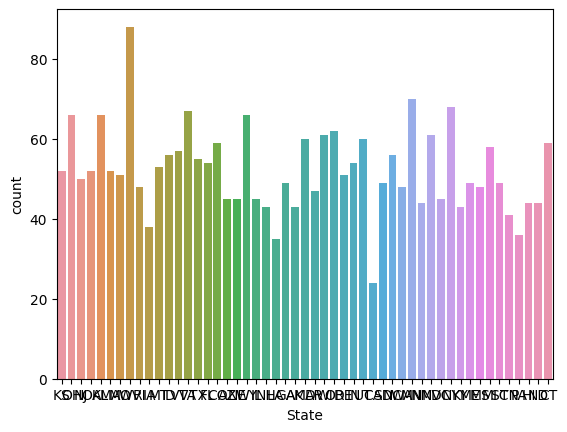

In [67]:
sns.countplot(x=df['State'],data=df)

In [68]:
df['International plan'].value_counts()


No     2396
Yes     270
Name: International plan, dtype: int64

<Axes: xlabel='International plan', ylabel='count'>

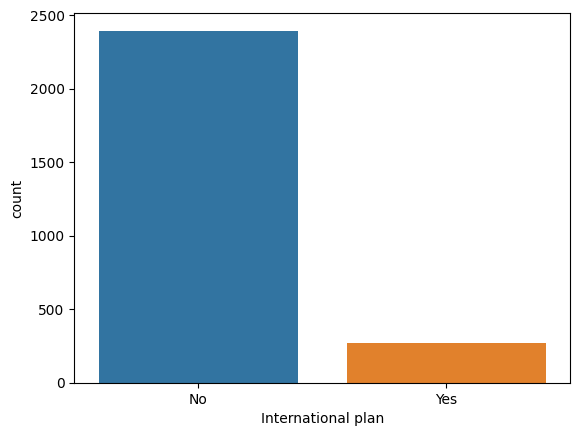

In [69]:
sns.countplot(x=df['International plan'],data=df)


<Axes: xlabel='International plan', ylabel='count'>

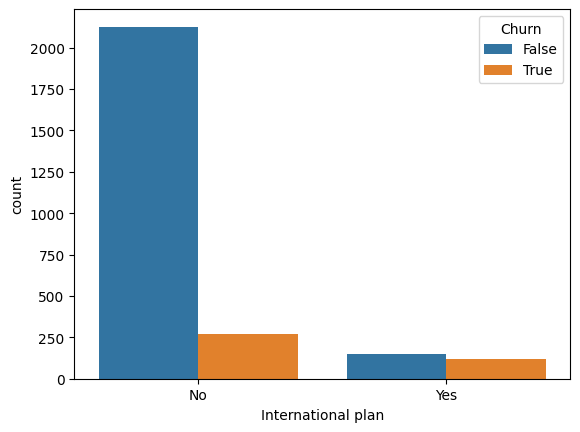

In [70]:
sns.countplot(x=df['International plan'],data=df,hue='Churn')

In [71]:
df['Voice mail plan'].value_counts()

No     1933
Yes     733
Name: Voice mail plan, dtype: int64

<Axes: xlabel='Voice mail plan', ylabel='count'>

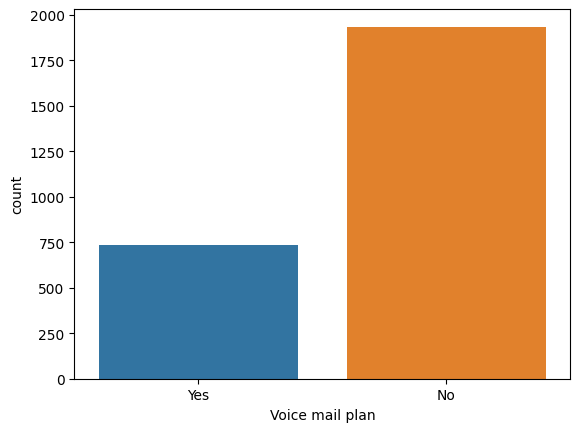

In [72]:
sns.countplot(x=df['Voice mail plan'],data=df)

<Axes: xlabel='Voice mail plan', ylabel='count'>

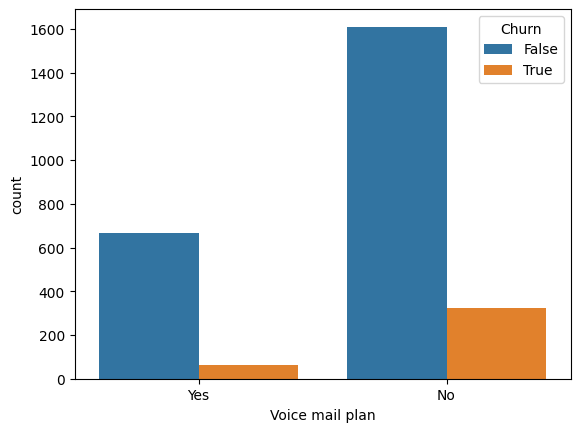

In [73]:
sns.countplot(x=df['Voice mail plan'],data=df,hue='Churn')

In [74]:
df['Churn'].value_counts()

False    2278
True      388
Name: Churn, dtype: int64

<Axes: xlabel='Churn', ylabel='count'>

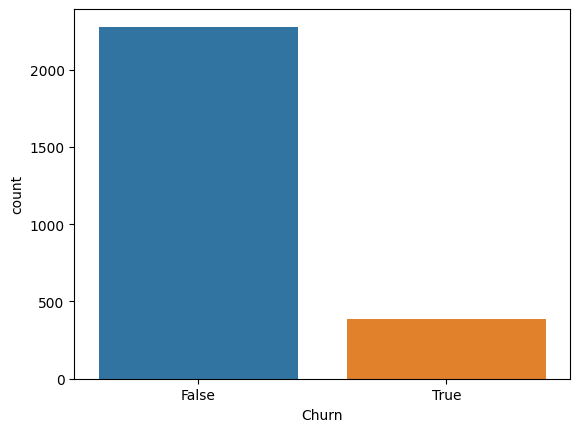

In [75]:
sns.countplot(x=df['Churn'])


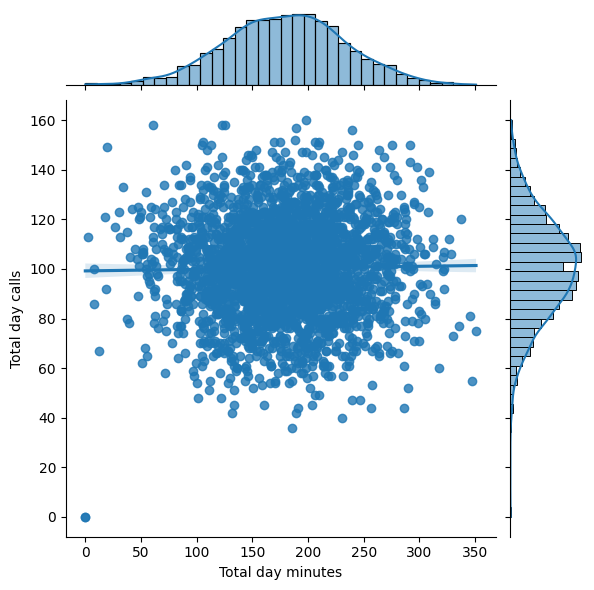

In [76]:
sns.jointplot(x='Total day minutes',y='Total day calls',data=df,kind='reg')

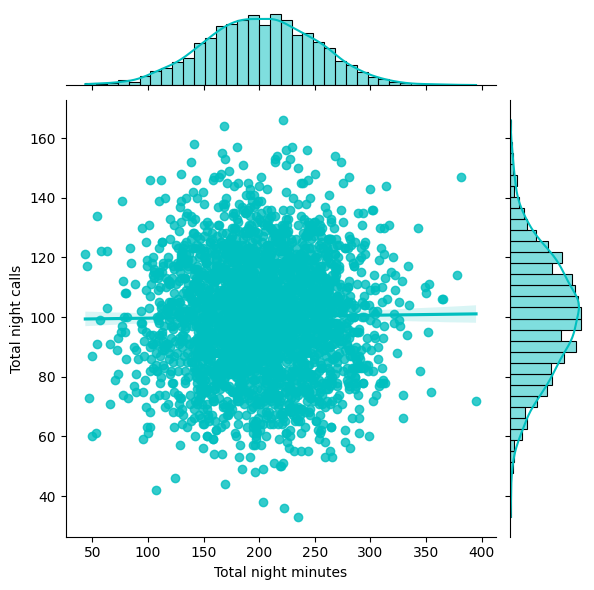

In [77]:
sns.jointplot(x='Total night minutes',y='Total night calls',data=df,kind='reg',color='c')

In [78]:
df.corr()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
Account length,1.000000,-0.008620,-0.002996,0.002847,0.038862,0.002843,-0.015923,0.018552,-0.015909,-0.008994,-0.024007,-0.008999,0.011369,0.017627,0.011383,0.002455,0.017728
Area code,-0.008620,1.000000,-0.000584,-0.023134,-0.009629,-0.023130,0.000679,-0.018602,0.000707,-0.003353,0.011455,-0.003382,-0.013418,-0.027423,-0.013534,0.034442,0.001019
Number vmail messages,-0.002996,-0.000584,1.000000,0.019027,-0.009622,0.019027,0.011401,0.005131,0.011418,-0.000224,0.008124,-0.000229,-0.004156,0.027013,-0.004136,-0.018787,-0.086474
Total day minutes,0.002847,-0.023134,0.019027,1.000000,0.016780,1.000000,0.003999,0.009059,0.003992,0.013491,0.015054,0.013464,-0.011042,0.005687,-0.010934,-0.024543,0.195688
Total day calls,0.038862,-0.009629,-0.009622,0.016780,1.000000,0.016787,-0.026003,0.006473,-0.026006,0.008986,-0.016776,0.008972,0.031036,0.006928,0.031133,-0.011945,0.018290
Total day charge,0.002843,-0.023130,0.019027,1.000000,0.016787,1.000000,0.004008,0.009056,0.004002,0.013495,0.015057,0.013468,-0.011046,0.005688,-0.010938,-0.024548,0.195689
Total eve minutes,-0.015923,0.000679,0.011401,0.003999,-0.026003,0.004008,1.000000,-0.007654,1.000000,-0.013414,0.009017,-0.013450,-0.006915,0.002160,-0.006947,-0.013192,0.072906
Total eve calls,0.018552,-0.018602,0.005131,0.009059,0.006473,0.009056,-0.007654,1.000000,-0.007642,-0.000175,0.000797,-0.000135,0.011012,0.003710,0.011000,0.001058,-0.001539
Total eve charge,-0.015909,0.000707,0.011418,0.003992,-0.026006,0.004002,1.000000,-0.007642,1.000000,-0.013428,0.009030,-0.013464,-0.006923,0.002169,-0.006955,-0.013196,0.072893
Total night minutes,-0.008994,-0.003353,-0.000224,0.013491,0.008986,0.013495,-0.013414,-0.000175,-0.013428,1.000000,0.012736,0.999999,-0.008607,-0.001110,-0.008510,0.005236,0.033639


<Axes: >

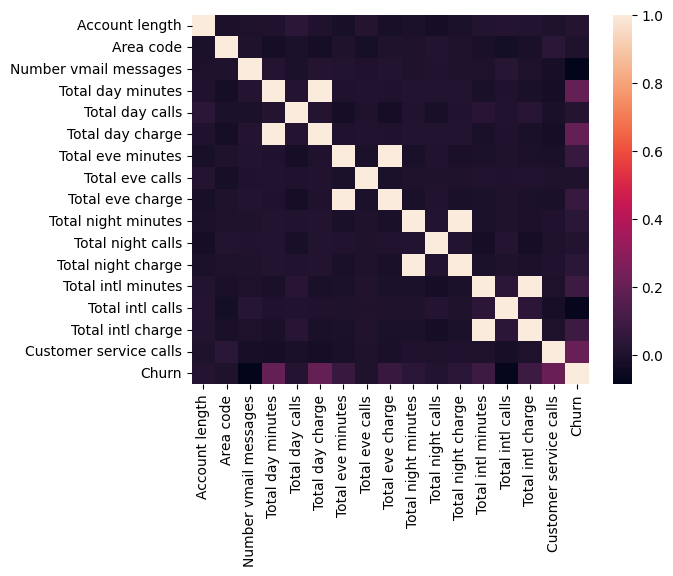

In [79]:
sns.heatmap(df.corr())

**TRAINING DATA ENCODING**

In [80]:
df1=pd.get_dummies(df[['State','International plan','Voice mail plan']],drop_first=True)
df1

,State_AL,State_AR,State_AZ,State_CA,State_CO,State_CT,State_DC,State_DE,State_FL,State_GA,...,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY,International plan_Yes,Voice mail plan_Yes
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2661,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2662,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2663,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2664,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [81]:
df2=pd.concat([df,df1],axis=1)
df2

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY,International plan_Yes,Voice mail plan_Yes
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,...,0,0,0,0,0,0,0,0,0,1
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,...,0,0,0,0,0,0,0,0,0,1
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,...,0,0,0,0,0,0,0,0,0,0
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,...,0,0,0,0,0,0,0,0,1,0
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2661,SC,79,415,No,No,0,134.7,98,22.90,189.7,...,0,0,0,0,0,0,0,0,0,0
2662,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,...,0,0,0,0,0,0,0,0,0,1
2663,WV,68,415,No,No,0,231.1,57,39.29,153.4,...,0,0,0,0,0,0,1,0,0,0
2664,RI,28,510,No,No,0,180.8,109,30.74,288.8,...,0,0,0,0,0,0,0,0,0,0


In [82]:
df2.drop(['State','International plan','Voice mail plan'],axis=1,inplace=True)
df2

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,...,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY,International plan_Yes,Voice mail plan_Yes
0,128,415,25,265.1,110,45.07,197.4,99,16.78,244.7,...,0,0,0,0,0,0,0,0,0,1
1,107,415,26,161.6,123,27.47,195.5,103,16.62,254.4,...,0,0,0,0,0,0,0,0,0,1
2,137,415,0,243.4,114,41.38,121.2,110,10.30,162.6,...,0,0,0,0,0,0,0,0,0,0
3,84,408,0,299.4,71,50.90,61.9,88,5.26,196.9,...,0,0,0,0,0,0,0,0,1,0
4,75,415,0,166.7,113,28.34,148.3,122,12.61,186.9,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2661,79,415,0,134.7,98,22.90,189.7,68,16.12,221.4,...,0,0,0,0,0,0,0,0,0,0
2662,192,415,36,156.2,77,26.55,215.5,126,18.32,279.1,...,0,0,0,0,0,0,0,0,0,1
2663,68,415,0,231.1,57,39.29,153.4,55,13.04,191.3,...,0,0,0,0,0,0,1,0,0,0
2664,28,510,0,180.8,109,30.74,288.8,58,24.55,191.9,...,0,0,0,0,0,0,0,0,0,0


In [83]:
x_train=df2.drop(['Churn'],axis=1)
x_train

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,...,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY,International plan_Yes,Voice mail plan_Yes
0,128,415,25,265.1,110,45.07,197.4,99,16.78,244.7,...,0,0,0,0,0,0,0,0,0,1
1,107,415,26,161.6,123,27.47,195.5,103,16.62,254.4,...,0,0,0,0,0,0,0,0,0,1
2,137,415,0,243.4,114,41.38,121.2,110,10.30,162.6,...,0,0,0,0,0,0,0,0,0,0
3,84,408,0,299.4,71,50.90,61.9,88,5.26,196.9,...,0,0,0,0,0,0,0,0,1,0
4,75,415,0,166.7,113,28.34,148.3,122,12.61,186.9,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2661,79,415,0,134.7,98,22.90,189.7,68,16.12,221.4,...,0,0,0,0,0,0,0,0,0,0
2662,192,415,36,156.2,77,26.55,215.5,126,18.32,279.1,...,0,0,0,0,0,0,0,0,0,1
2663,68,415,0,231.1,57,39.29,153.4,55,13.04,191.3,...,0,0,0,0,0,0,1,0,0,0
2664,28,510,0,180.8,109,30.74,288.8,58,24.55,191.9,...,0,0,0,0,0,0,0,0,0,0


In [84]:
y_train=df2['Churn']
y_train

0       False
1       False
2       False
3       False
4       False
        ...  
2661    False
2662    False
2663    False
2664    False
2665    False
Name: Churn, Length: 2666, dtype: bool

**TESTING DATA**

In [85]:
df3=pd.read_csv('/content/churn-bigml-20.csv')
df3

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,WI,114,415,No,Yes,26,137.1,88,23.31,155.7,125,13.23,247.6,94,11.14,11.5,7,3.11,2,False
663,AL,106,408,No,Yes,29,83.6,131,14.21,203.9,131,17.33,229.5,73,10.33,8.1,3,2.19,1,False
664,VT,60,415,No,No,0,193.9,118,32.96,85.0,110,7.23,210.1,134,9.45,13.2,8,3.56,3,False
665,WV,159,415,No,No,0,169.8,114,28.87,197.7,105,16.80,193.7,82,8.72,11.6,4,3.13,1,False


***Testining data preprocessing***

In [86]:
df3.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False


In [87]:
df3.tail()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
662,WI,114,415,No,Yes,26,137.1,88,23.31,155.7,125,13.23,247.6,94,11.14,11.5,7,3.11,2,False
663,AL,106,408,No,Yes,29,83.6,131,14.21,203.9,131,17.33,229.5,73,10.33,8.1,3,2.19,1,False
664,VT,60,415,No,No,0,193.9,118,32.96,85.0,110,7.23,210.1,134,9.45,13.2,8,3.56,3,False
665,WV,159,415,No,No,0,169.8,114,28.87,197.7,105,16.80,193.7,82,8.72,11.6,4,3.13,1,False
666,CT,184,510,Yes,No,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [88]:
df3.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

In [89]:
df.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,2666.000000,2666.000000,2666.000000,2666.00000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000
mean,100.620405,437.438860,8.021755,179.48162,100.310203,30.512404,200.386159,100.023631,17.033072,201.168942,100.106152,9.052689,10.237022,4.467367,2.764490,1.562641
std,39.563974,42.521018,13.612277,54.21035,19.988162,9.215733,50.951515,20.161445,4.330864,50.780323,19.418459,2.285120,2.788349,2.456195,0.752812,1.311236
min,1.000000,408.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,43.700000,33.000000,1.970000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,408.000000,0.000000,143.40000,87.000000,24.380000,165.300000,87.000000,14.050000,166.925000,87.000000,7.512500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,415.000000,0.000000,179.95000,101.000000,30.590000,200.900000,100.000000,17.080000,201.150000,100.000000,9.050000,10.200000,4.000000,2.750000,1.000000
75%,127.000000,510.000000,19.000000,215.90000,114.000000,36.700000,235.100000,114.000000,19.980000,236.475000,113.000000,10.640000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,50.000000,350.80000,160.000000,59.640000,363.700000,170.000000,30.910000,395.000000,166.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [90]:
df.isna().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

***Testining data visualisation***

In [91]:
df3['State'].value_counts()

AZ    19
ND    18
WV    18
NJ    18
KS    18
NM    18
WA    18
RI    17
ID    17
MS    17
WI    17
TX    17
IN    17
LA    16
NE    16
OR    16
KY    16
VT    16
NY    15
MI    15
MT    15
CT    15
AL    14
MN    14
MA    13
IL    13
ME    13
NH    13
TN    12
UT    12
NC    12
MO    12
OH    12
SD    11
WY    11
SC    11
CA    10
DE    10
VA    10
MD    10
FL     9
AK     9
DC     9
HI     9
PA     9
OK     9
AR     8
CO     7
IA     6
NV     5
GA     5
Name: State, dtype: int64

<Axes: xlabel='State', ylabel='count'>

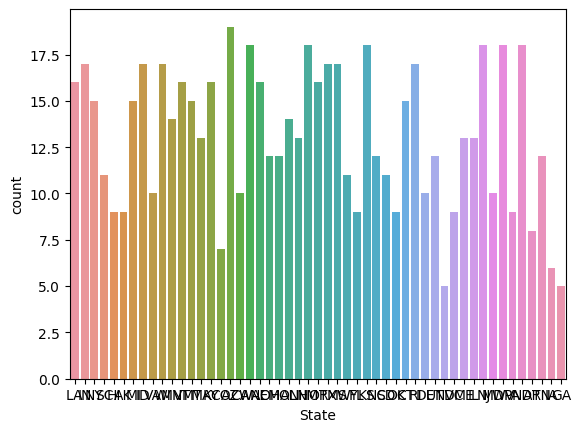

In [92]:
sns.countplot(x=df3['State'],data=df3)

In [93]:
df3['International plan'].value_counts()

No     614
Yes     53
Name: International plan, dtype: int64

<Axes: xlabel='International plan', ylabel='count'>

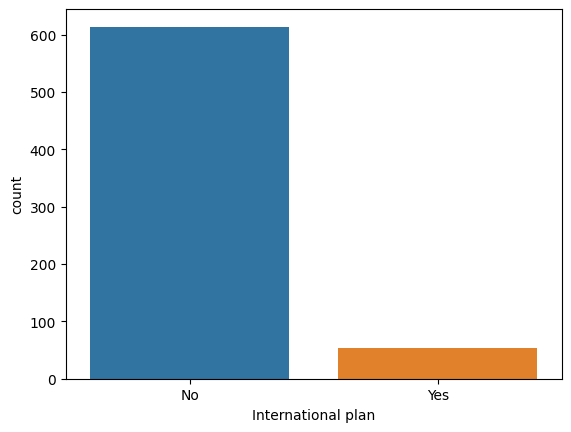

In [94]:
sns.countplot(x=df3['International plan'],data=df3)

<Axes: xlabel='International plan', ylabel='count'>

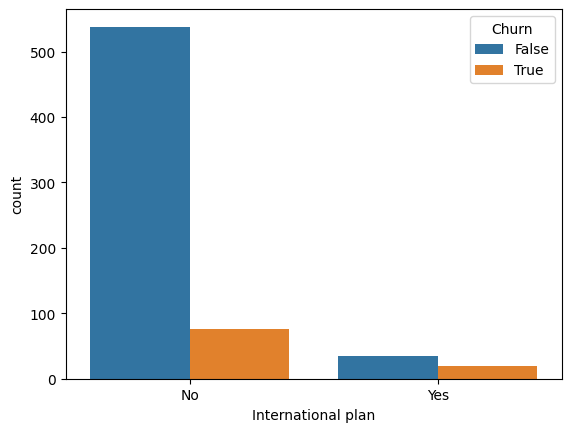

In [95]:
sns.countplot(x=df3['International plan'],data=df3,hue='Churn')

In [96]:
df3['Voice mail plan'].value_counts()

No     478
Yes    189
Name: Voice mail plan, dtype: int64

<Axes: xlabel='Voice mail plan', ylabel='count'>

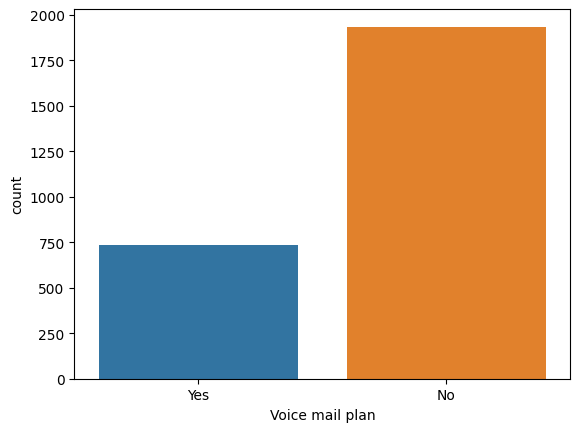

In [97]:
sns.countplot(x=df['Voice mail plan'],data=df3)

<Axes: xlabel='Voice mail plan', ylabel='count'>

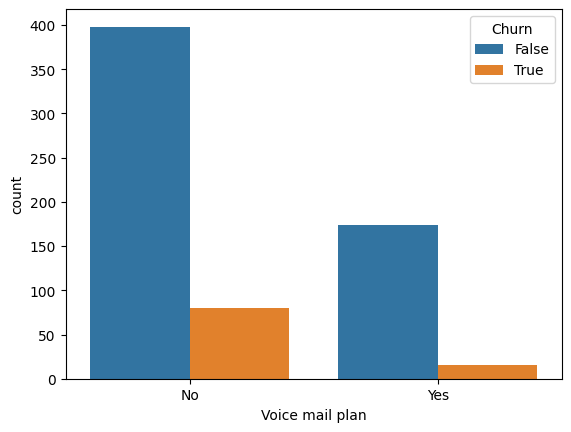

In [98]:
sns.countplot(x=df3['Voice mail plan'],data=df3,hue='Churn')

In [99]:
df3['Churn'].value_counts()

False    572
True      95
Name: Churn, dtype: int64

<Axes: xlabel='Churn', ylabel='count'>

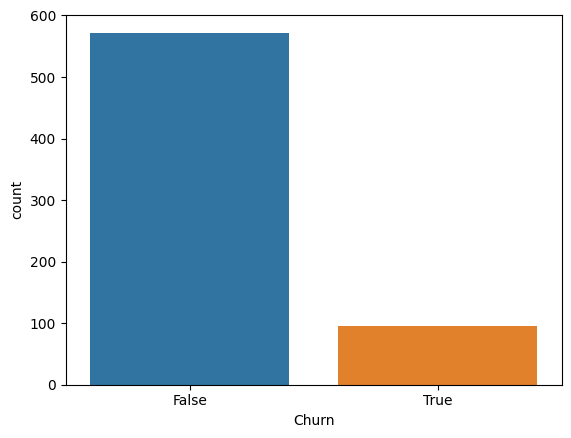

In [100]:
sns.countplot(x=df3['Churn'])

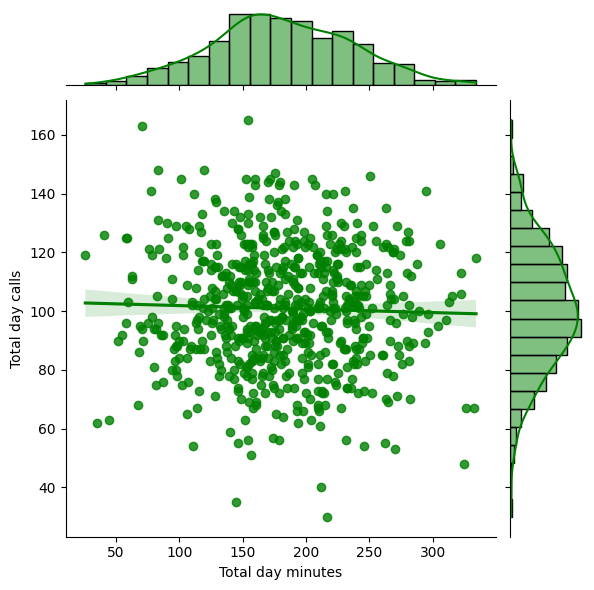

In [101]:
sns.jointplot(x='Total day minutes',y='Total day calls',data=df3,kind='reg',color='g')

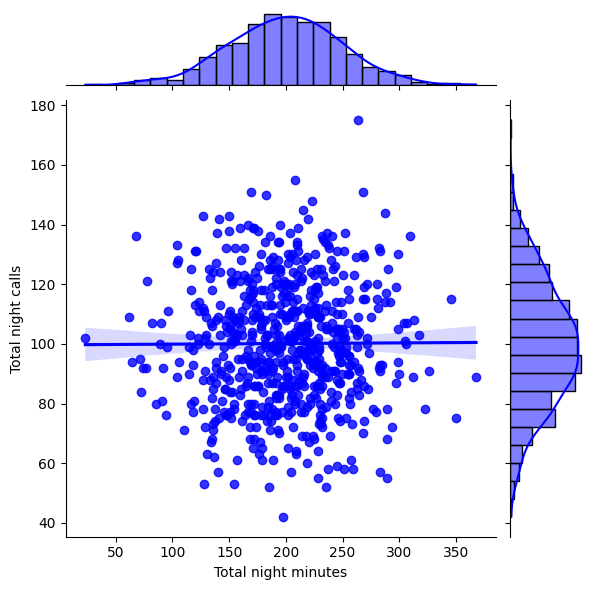

In [102]:
sns.jointplot(x='Total night minutes',y='Total night calls',data=df3,kind='reg',color='b')

In [103]:
df3.corr()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
Account length,1.000000,-0.026327,-0.011993,0.017833,0.035703,0.017839,0.027043,0.021237,0.027051,-0.007527,0.027228,-0.007528,0.002362,0.031279,0.002456,-0.027677,0.012315
Area code,-0.026327,1.000000,-0.006907,0.051507,-0.008972,0.051492,0.017160,0.017783,0.017182,-0.016832,0.036421,-0.016818,-0.037980,-0.010530,-0.038044,0.000103,0.027129
Number vmail messages,-0.011993,-0.006907,1.000000,-0.069172,-0.009952,-0.069187,0.040865,-0.051951,0.040876,0.039751,0.003367,0.039680,0.029949,-0.036847,0.029999,0.007859,-0.102381
Total day minutes,0.017833,0.051507,-0.069172,1.000000,-0.032306,1.000000,0.017987,0.043219,0.017945,-0.031600,0.052761,-0.031603,-0.006725,0.016597,-0.006841,0.029291,0.242781
Total day calls,0.035703,-0.008972,-0.009952,-0.032306,1.000000,-0.032319,-0.004688,0.005851,-0.004664,0.079536,-0.030074,0.079529,-0.015319,-0.005155,-0.015201,-0.045953,0.019360
Total day charge,0.017839,0.051492,-0.069187,1.000000,-0.032319,1.000000,0.017983,0.043231,0.017941,-0.031613,0.052748,-0.031616,-0.006720,0.016582,-0.006836,0.029290,0.242777
Total eve minutes,0.027043,0.017160,0.040865,0.017987,-0.004688,0.017983,1.000000,-0.029077,1.000000,-0.007705,0.001938,-0.007603,-0.027855,0.002929,-0.027887,-0.012213,0.175614
Total eve calls,0.021237,0.017783,-0.051951,0.043219,0.005851,0.043231,-0.029077,1.000000,-0.029089,-0.009856,0.036068,-0.009833,-0.001050,0.074829,-0.001152,0.008126,0.055669
Total eve charge,0.027051,0.017182,0.040876,0.017945,-0.004664,0.017941,1.000000,-0.029089,1.000000,-0.007691,0.001939,-0.007589,-0.027863,0.002894,-0.027895,-0.012212,0.175616
Total night minutes,-0.007527,-0.016832,0.039751,-0.031600,0.079536,-0.031613,-0.007705,-0.009856,-0.007691,1.000000,0.005209,0.999999,-0.041969,-0.057212,-0.042221,-0.067602,0.042930


<Axes: >

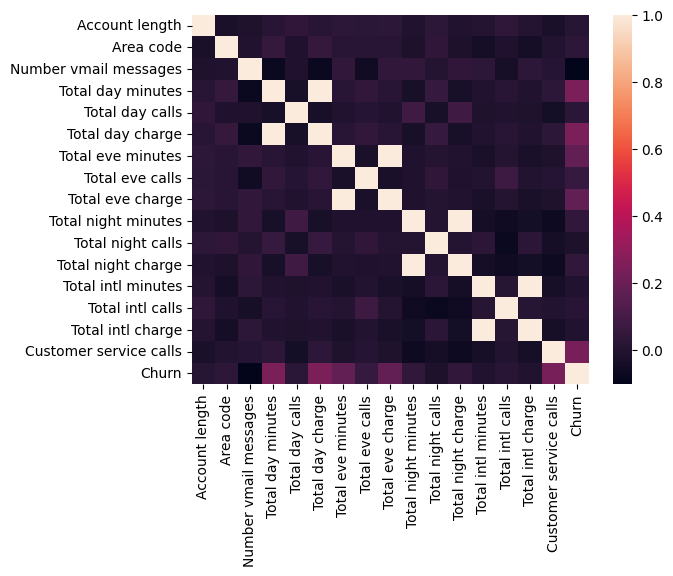

In [104]:
sns.heatmap(df3.corr())

***Testining data encoding***

In [105]:
df4=pd.get_dummies(df3[['State','International plan','Voice mail plan']],drop_first=True)
df4

,State_AL,State_AR,State_AZ,State_CA,State_CO,State_CT,State_DC,State_DE,State_FL,State_GA,...,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY,International plan_Yes,Voice mail plan_Yes
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
663,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
664,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
665,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [106]:
df5=pd.concat([df3,df4],axis=1)
df5

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY,International plan_Yes,Voice mail plan_Yes
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,...,0,0,0,0,0,0,0,0,0,0
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,...,0,0,0,0,0,0,0,0,0,0
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,...,0,0,0,0,0,0,0,0,0,0
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,...,0,0,0,0,0,0,0,0,0,0
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,WI,114,415,No,Yes,26,137.1,88,23.31,155.7,...,0,0,0,0,0,1,0,0,0,1
663,AL,106,408,No,Yes,29,83.6,131,14.21,203.9,...,0,0,0,0,0,0,0,0,0,1
664,VT,60,415,No,No,0,193.9,118,32.96,85.0,...,0,0,0,1,0,0,0,0,0,0
665,WV,159,415,No,No,0,169.8,114,28.87,197.7,...,0,0,0,0,0,0,1,0,0,0


In [107]:
df5.drop(['State','International plan','Voice mail plan'],axis=1,inplace=True)
df5

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,...,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY,International plan_Yes,Voice mail plan_Yes
0,117,408,0,184.5,97,31.37,351.6,80,29.89,215.8,...,0,0,0,0,0,0,0,0,0,0
1,65,415,0,129.1,137,21.95,228.5,83,19.42,208.8,...,0,0,0,0,0,0,0,0,0,0
2,161,415,0,332.9,67,56.59,317.8,97,27.01,160.6,...,0,0,0,0,0,0,0,0,0,0
3,111,415,0,110.4,103,18.77,137.3,102,11.67,189.6,...,0,0,0,0,0,0,0,0,0,0
4,49,510,0,119.3,117,20.28,215.1,109,18.28,178.7,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,114,415,26,137.1,88,23.31,155.7,125,13.23,247.6,...,0,0,0,0,0,1,0,0,0,1
663,106,408,29,83.6,131,14.21,203.9,131,17.33,229.5,...,0,0,0,0,0,0,0,0,0,1
664,60,415,0,193.9,118,32.96,85.0,110,7.23,210.1,...,0,0,0,1,0,0,0,0,0,0
665,159,415,0,169.8,114,28.87,197.7,105,16.80,193.7,...,0,0,0,0,0,0,1,0,0,0


In [108]:
x_test=df5.drop(['Churn'],axis=1)
x_test

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,...,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY,International plan_Yes,Voice mail plan_Yes
0,117,408,0,184.5,97,31.37,351.6,80,29.89,215.8,...,0,0,0,0,0,0,0,0,0,0
1,65,415,0,129.1,137,21.95,228.5,83,19.42,208.8,...,0,0,0,0,0,0,0,0,0,0
2,161,415,0,332.9,67,56.59,317.8,97,27.01,160.6,...,0,0,0,0,0,0,0,0,0,0
3,111,415,0,110.4,103,18.77,137.3,102,11.67,189.6,...,0,0,0,0,0,0,0,0,0,0
4,49,510,0,119.3,117,20.28,215.1,109,18.28,178.7,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,114,415,26,137.1,88,23.31,155.7,125,13.23,247.6,...,0,0,0,0,0,1,0,0,0,1
663,106,408,29,83.6,131,14.21,203.9,131,17.33,229.5,...,0,0,0,0,0,0,0,0,0,1
664,60,415,0,193.9,118,32.96,85.0,110,7.23,210.1,...,0,0,0,1,0,0,0,0,0,0
665,159,415,0,169.8,114,28.87,197.7,105,16.80,193.7,...,0,0,0,0,0,0,1,0,0,0


In [109]:
y_test=df5['Churn']
y_test

0      False
1       True
2       True
3      False
4      False
       ...  
662    False
663    False
664    False
665    False
666    False
Name: Churn, Length: 667, dtype: bool

***Normalizing the data using MinMaxScalar***

In [110]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(x_train)
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)
x_train

array([[0.52479339, 0.06862745, 0.5       , ..., 0.        , 0.        ,
        1.        ],
       [0.43801653, 0.06862745, 0.52      , ..., 0.        , 0.        ,
        1.        ],
       [0.56198347, 0.06862745, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.2768595 , 0.06862745, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.11157025, 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.30165289, 0.06862745, 0.5       , ..., 0.        , 0.        ,
        1.        ]])

**MODEL CREATION**

In [111]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
k_model=KNeighborsClassifier(n_neighbors=7)
nb_model=MultinomialNB()
sv_model=SVC()
model=[k_model,nb_model,sv_model]

***PERFORMANCE EVALUATION***

In [112]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
for i in model:
  i.fit(x_train,y_train)
  y_pred=i.predict(x_test)
  result=confusion_matrix(y_test,y_pred)
  print(result)
  print(accuracy_score(y_test,y_pred))
  print(classification_report(y_test,y_pred))
  print("*"*100)

[[571   1]
 [ 91   4]]
0.8620689655172413
              precision    recall  f1-score   support

       False       0.86      1.00      0.93       572
        True       0.80      0.04      0.08        95

    accuracy                           0.86       667
   macro avg       0.83      0.52      0.50       667
weighted avg       0.85      0.86      0.81       667

****************************************************************************************************
[[569   3]
 [ 91   4]]
0.8590704647676162
              precision    recall  f1-score   support

       False       0.86      0.99      0.92       572
        True       0.57      0.04      0.08        95

    accuracy                           0.86       667
   macro avg       0.72      0.52      0.50       667
weighted avg       0.82      0.86      0.80       667

****************************************************************************************************
[[569   3]
 [ 88   7]]
0.863568215892054
              preci

**CONCLUSIONS**:


Telecommunication industry has suffered from high churn rates and immense profit loss due to churning. But we can avoid the customer churn. The importance of this type of research in the telecom market is to help companies make more profit. It has become known that predicting churn is one of the most important sources of income to telecom companies. Hence, this research aimed to build a system that predicts the churn of customers.




